In [1]:
#!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) 
colour_pal = sns.color_palette( palette="rocket_r", n_colors=10)

from fredapi import Fred

api_key = '03dffa8c09ead4c80ea8683e1dcece58'


### 1. Create the Fred object

In [3]:
fred = Fred(api_key=api_key)

### 2. Search Fred for economic data

In [44]:
unemployment_df.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [4]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-11,2023-02-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-10 08:56:14-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-11,2023-02-11,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-11,2023-02-11,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-10 08:56:17-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-11,2023-02-11,S&P 500,2013-02-11,2023-02-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-10 19:11:01-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-11,2023-02-11,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,81,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI06IRA156NWDB,DDDI06IRA156NWDB,2023-02-11,2023-02-11,Central Bank Assets to GDP for Islamic Republi...,1960-01-01,2016-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:24:11-05:00,2,Ratio of central bank assets to GDP. Central b...
CRDQFRAPABIS,CRDQFRAPABIS,2023-02-11,2023-02-11,"Total Credit to Private Non-Financial Sector, ...",1969-10-01,2022-04-01,"Quarterly, End of Quarter",Q,Billions of Euros,Bil. of Euros,Not Seasonally Adjusted,NSA,2022-12-05 13:02:05-06:00,2,"Credit is provided by domestic banks, all othe..."
DDOI02GRA156NWDB,DDOI02GRA156NWDB,2023-02-11,2023-02-11,Bank Deposits to GDP for Greece,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:24:36-05:00,2,"The total value of demand, time and saving dep..."


In [5]:
sp_search['title'].unique()[:5]

array(['ICE BofA US High Yield Index Option-Adjusted Spread',
       'S&P/Case-Shiller U.S. National Home Price Index',
       'ICE BofA US High Yield Index Effective Yield', 'S&P 500',
       'Real Median Household Income in the United States'], dtype=object)

### 3. Pull raw data from FRED

<AxesSubplot: >

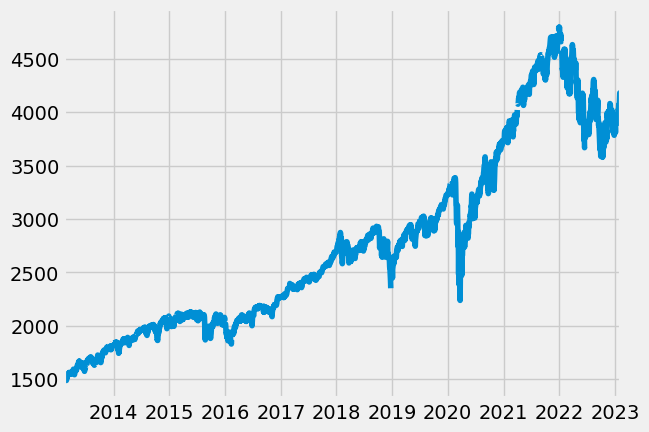

In [6]:
fred.get_series('SP500').plot()

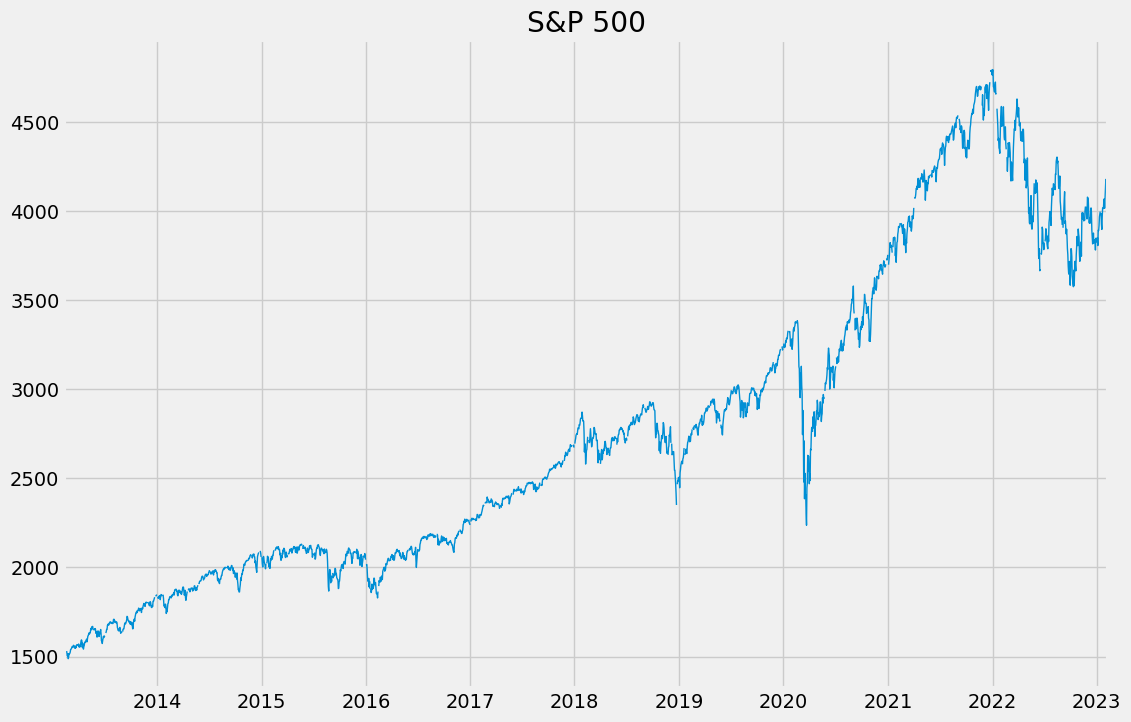

In [31]:
fred.get_series('SP500').plot(figsize=(12,8), title='S&P 500', lw=1)
plt.show()

### 4, Pull and join multiple data sets

In [7]:
unemployment = fred.search("unemployment", order_by='popularity')
unemployment

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-02-11,2023-02-11,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-12-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-02-10 13:13:01-06:00,96,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2023-02-11,2023-02-11,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2023-02-11,2023-02-11,"All Employees, Total Nonfarm",1939-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:45:01-06:00,85,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2023-02-11,2023-02-11,Initial Claims,1967-01-07,2023-02-04,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-09 07:36:08-06:00,82,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2023-02-11,2023-02-11,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-01-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-02-03 07:45:02-06:00,80,The series comes from the 'Current Employment ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOTLLM2534,TOTLLM2534,2023-02-11,2023-02-11,"Civilian Labor Force - 25 to 34 years, Men",2000-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2023-02-04 02:00:03-06:00,6,The civilian labor force is the sum of employe...
MSLOURN,MSLOURN,2023-02-11,2023-02-11,"Unemployment Rate in Lowndes County, MS",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:22:07-06:00,6,These data come from the Current Population Su...
GAWHIT5URN,GAWHIT5URN,2023-02-11,2023-02-11,"Unemployment Rate in Whitfield County, GA",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:14:03-06:00,6,These data come from the Current Population Su...


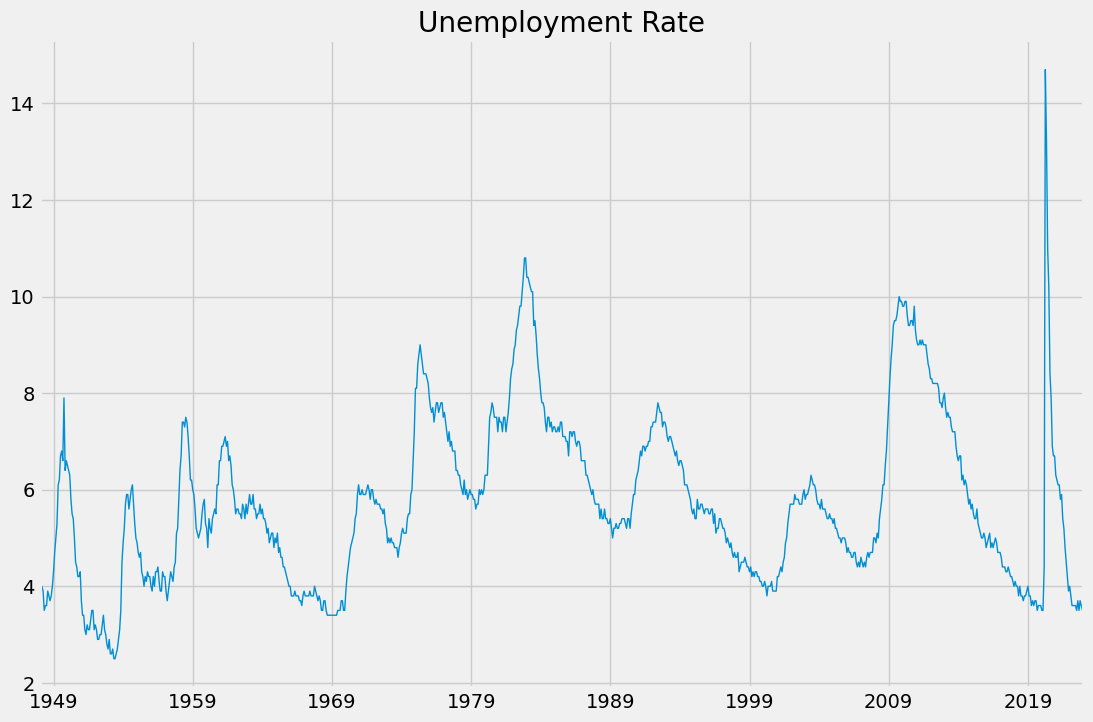

In [8]:
fred.get_series('UNRATE').plot(figsize=(12,8), title='Unemployment Rate', lw=1)
plt.show()

In [11]:
unemployment_df = fred.search("unemployment rate state", filter==("frequency", "Monthly"))

/Users/davidelks/Dropbox/Personal/islington_news/myenv/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/davidelks/Dropbox/Personal/islington_news/myenv/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/davidelks/Dropbox/Personal/islington_news/myenv/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/davidelks/Dropbox/Personal/islington_news/myenv/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [12]:
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-11,2023-02-11,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-11,2023-02-11,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2023-02-11,2023-02-11,Continued Claims (Insured Unemployment),1967-01-07,2023-01-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-09 07:36:02-06:00,73,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-02-11,2023-02-11,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,69,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-11,2023-02-11,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC318640110SA,ENUC318640110SA,2023-02-11,2023-02-11,Average Weekly Wages for Employees in Federal ...,2013-01-01,2022-04-01,Quarterly,Q,Dollars per Week,$ per Week,Seasonally Adjusted,SA,2022-12-06 11:20:38-06:00,0,Average weekly wages are the wages paid by une...
ENUC403440310SA,ENUC403440310SA,2023-02-11,2023-02-11,Average Weekly Wages for Employees in Local Go...,1990-01-01,2022-04-01,Quarterly,Q,Dollars per Week,$ per Week,Seasonally Adjusted,SA,2022-12-06 11:20:29-06:00,0,Average weekly wages are the wages paid by une...
ENUC193440310SA,ENUC193440310SA,2023-02-11,2023-02-11,Average Weekly Wages for Employees in Local Go...,2019-10-01,2022-04-01,Quarterly,Q,Dollars per Week,$ per Week,Seasonally Adjusted,SA,2022-12-06 11:20:48-06:00,0,Average weekly wages are the wages paid by une...


In [14]:
unemployment_df = unemployment_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [22]:
unemployment_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-11,2023-02-11,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-02-11,2023-02-11,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-11,2023-02-11,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-11,2023-02-11,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
Q0892BUSQ156SNBR,Q0892BUSQ156SNBR,2023-02-11,2023-02-11,Unemployment Rate for United States,1940-04-01,1946-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:30:53-05:00,35,Series Is Presented Here As Three Variables--(...


In [70]:
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]



In [55]:
unemployment_df.shape

(207, 15)

In [78]:
pd.set_option('display.max_rows', 500)
unemployment_df = unemployment_df.query("title.str.contains('Rate in') and ~title.str.contains('Census')\
    and ~title.str.contains('Region') and ~title.str.contains('division') and \
    ~title.str.contains('DISCON')").head(70)


In [80]:
unemployment_df.shape

(54, 15)

In [92]:
unemployment_df.index.unique()

Index(['CAUR', 'FLUR', 'TXUR', 'NYUR', 'OHUR', 'PAUR', 'MIUR', 'ALUR', 'NCUR',
       'ILUR', 'WIUR', 'VAUR', 'TNUR', 'NJUR', 'COUR', 'GAUR', 'WAUR', 'MNUR',
       'KYUR', 'MOUR', 'WVUR', 'AZUR', 'MAUR', 'INUR', 'OKUR', 'ARUR', 'SCUR',
       'LAUR', 'NVUR', 'IAUR', 'ORUR', 'MDUR', 'NMUR', 'UTUR',
       'LASMT261982000000003', 'AKUR', 'HIUR', 'PRUR', 'NDUR', 'NEUR', 'IDUR',
       'CTUR', 'MEUR', 'MTUR', 'DCUR', 'SDUR', 'KSUR', 'MSUR', 'NHUR', 'WYUR',
       'LASMT391746000000003', 'RIUR', 'DEUR', 'VTUR'],
      dtype='object', name='series id')

In [81]:
from time import sleep  # import time

In [82]:
# introduce a delay of 5 seconds

In [93]:
all_results=[]
for myid in unemployment_df.index:
    results = fred.get_series(myid)
    sleep(1)  # import time
    results.to_frame(name=myid)
    all_results.append(results)

### Create a dataframe with all the unemployment data


In [95]:
all_results[0].head()

1976-01-01    9.2
1976-02-01    9.2
1976-03-01    9.1
1976-04-01    9.1
1976-05-01    9.0
dtype: float64

In [99]:
mgd = pd.concat(all_results, axis=1).sort_index()

In [100]:
mgd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,9.9,6.6,6.4,6.6,5.8,6.1,6.0,10.3,5.8,8.4,8.5,6.0,5.6,5.9,7.5,10.2,10.5,6.6,5.8,7.3,7.4,6.3,9.2,4.3,9.5,6.4,8.6,5.8,NaN,7.1,9.8,19.6,3.4,3.3,5.6,9.8,8.7,5.8,8.7,3.3,4.2,6.7,6.5,4.1,NaN,7.8,8.0,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,9.9,6.6,6.4,6.6,5.8,6.1,6.0,10.3,5.7,8.4,8.5,6.0,5.6,5.9,7.5,10.2,10.5,6.6,5.8,7.3,7.4,6.3,9.2,4.3,9.5,6.4,8.7,5.9,NaN,7.1,9.8,19.5,3.4,3.3,5.6,9.8,8.7,5.8,8.7,3.3,4.2,6.7,6.5,4.1,NaN,7.8,8.0,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,9.9,6.6,6.4,6.6,5.7,6.1,6.0,10.3,5.7,8.4,8.4,5.9,5.6,5.9,7.5,10.1,10.5,6.5,5.8,7.3,7.3,6.3,9.2,4.3,9.4,6.4,8.7,5.8,NaN,7.0,9.8,19.3,3.4,3.3,5.6,9.8,8.6,5.8,8.6,3.2,4.2,6.6,6.5,4.1,NaN,7.7,8.0,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,9.8,6.5,6.3,6.6,5.6,6.0,6.0,10.3,5.6,8.3,8.5,5.8,5.6,6.0,7.5,10.0,10.3,6.3,5.8,7.2,7.2,6.4,9.0,4.2,9.2,6.4,8.6,5.8,NaN,6.9,9.7,19.0,3.5,3.2,5.6,9.6,8.6,5.8,8.5,3.1,4.2,6.4,6.5,4.0,NaN,7.7,8.1,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,9.6,6.4,6.1,6.6,5.5,5.9,5.9,10.3,5.6,8.1,8.5,5.7,5.5,6.0,7.4,9.8,10.1,6.0,5.7,7.1,7.0,6.5,8.9,4.1,9.1,6.5,8.6,5.7,NaN,6.9,9.4,18.9,3.6,3.1,5.6,9.4,8.5,5.8,8.4,3.1,4.2,6.3,6.5,3.9,NaN,7.7,8.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,2.7,4.1,4.7,4.0,4.2,4.1,2.6,3.5,4.5,3.1,2.6,3.4,4.0,3.4,2.8,3.7,1.9,3.8,2.5,3.9,3.5,3.6,2.8,3.1,3.4,3.1,3.5,4.4,2.6,3.7,4.3,4.4,2.0,3.8,4.6,4.0,5.8,2.3,2.1,2.7,4.1,3.1,2.8,5.1,2.3,2.5,3.6,2.0,3.1,5.2,2.8,4.5,2.1
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,2.6,3.6,4.5,3.2,2.6,3.4,3.3,3.4,2.8,3.7,2.0,3.8,2.4,4.0,3.7,3.4,2.8,3.2,3.5,3.2,3.4,4.4,2.7,3.8,4.0,4.2,2.1,3.7,4.4,3.5,NaN,2.2,2.2,2.8,4.0,3.3,2.9,4.7,2.3,2.6,3.6,2.2,3.3,5.1,3.1,4.3,2.1
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.0,4.2,2.7,3.8,4.6,3.3,2.7,3.5,3.4,3.6,2.9,3.8,2.1,3.9,2.6,4.0,3.9,3.5,3.0,3.4,3.6,3.3,3.3,4.6,2.9,4.1,4.5,4.3,2.1,3.6,4.5,3.3,NaN,2.3,2.4,2.9,4.3,3.6,3.0,4.8,2.4,2.8,3.8,2.4,3.5,5.1,3.4,4.3,2.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.0,4.3,2.7,3.9,4.7,3.3,2.8,3.5,3.4,3.5,3.0,4.0,2.3,4.0,2.7,4.1,4.1,3.4,3.0,3.4,3.7,3.3,3.3,4.9,3.1,4.3,4.3,4.1,2.2,3.6,4.5,3.3,NaN,2.3,2.5,3.0,4.2,3.7,2.9,4.6,2.4,2.8,3.9,2.6,3.6,5.1,3.6,4.4,2.5


In [101]:
mgd.columns = unemployment_df['title'].values

In [102]:
mgd

,Unemployment Rate in California,Unemployment Rate in Florida,Unemployment Rate in Texas,Unemployment Rate in New York,Unemployment Rate in Ohio,Unemployment Rate in Pennsylvania,Unemployment Rate in Michigan,Unemployment Rate in Alabama,Unemployment Rate in North Carolina,Unemployment Rate in Illinois,Unemployment Rate in Wisconsin,Unemployment Rate in Virginia,Unemployment Rate in Tennessee,Unemployment Rate in New Jersey,Unemployment Rate in Colorado,Unemployment Rate in Georgia,Unemployment Rate in Washington,Unemployment Rate in Minnesota,Unemployment Rate in Kentucky,Unemployment Rate in Missouri,Unemployment Rate in West Virginia,Unemployment Rate in Arizona,Unemployment Rate in Massachusetts,Unemployment Rate in Indiana,Unemployment Rate in Oklahoma,Unemployment Rate in Arkansas,Unemployment Rate in South Carolina,Unemployment Rate in Louisiana,Unemployment Rate in Nevada,Unemployment Rate in Iowa,Unemployment Rate in Oregon,Unemployment Rate in Maryland,Unemployment Rate in New Mexico,Unemployment Rate in Utah,"Unemployment Rate in Detroit-Warren-Dearborn, MI (MSA)",Unemployment Rate in Alaska,Unemployment Rate in Hawaii,Unemployment Rate in Puerto Rico,Unemployment Rate in North Dakota,Unemployment Rate in Nebraska,Unemployment Rate in Idaho,Unemployment Rate in Connecticut,Unemployment Rate in Maine,Unemployment Rate in Montana,Unemployment Rate in the District of Columbia,Unemployment Rate in South Dakota,Unemployment Rate in Kansas,Unemployment Rate in Mississippi,Unemployment Rate in New Hampshire,Unemployment Rate in Wyoming,"Unemployment Rate in Cleveland-Elyria, OH (MSA)",Unemployment Rate in Rhode Island,Unemployment Rate in Delaware,Unemployment Rate in Vermont
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,9.9,6.6,6.4,6.6,5.8,6.1,6.0,10.3,5.8,8.4,8.5,6.0,5.6,5.9,7.5,10.2,10.5,6.6,5.8,7.3,7.4,6.3,9.2,4.3,9.5,6.4,8.6,5.8,NaN,7.1,9.8,19.6,3.4,3.3,5.6,9.8,8.7,5.8,8.7,3.3,4.2,6.7,6.5,4.1,NaN,7.8,8.0,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,9.9,6.6,6.4,6.6,5.8,6.1,6.0,10.3,5.7,8.4,8.5,6.0,5.6,5.9,7.5,10.2,10.5,6.6,5.8,7.3,7.4,6.3,9.2,4.3,9.5,6.4,8.7,5.9,NaN,7.1,9.8,19.5,3.4,3.3,5.6,9.8,8.7,5.8,8.7,3.3,4.2,6.7,6.5,4.1,NaN,7.8,8.0,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,9.9,6.6,6.4,6.6,5.7,6.1,6.0,10.3,5.7,8.4,8.4,5.9,5.6,5.9,7.5,10.1,10.5,6.5,5.8,7.3,7.3,6.3,9.2,4.3,9.4,6.4,8.7,5.8,NaN,7.0,9.8,19.3,3.4,3.3,5.6,9.8,8.6,5.8,8.6,3.2,4.2,6.6,6.5,4.1,NaN,7.7,8.0,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,9.8,6.5,6.3,6.6,5.6,6.0,6.0,10.3,5.6,8.3,8.5,5.8,5.6,6.0,7.5,10.0,10.3,6.3,5.8,7.2,7.2,6.4,9.0,4.2,9.2,6.4,8.6,5.8,NaN,6.9,9.7,19.0,3.5,3.2,5.6,9.6,8.6,5.8,8.5,3.1,4.2,6.4,6.5,4.0,NaN,7.7,8.1,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,9.6,6.4,6.1,6.6,5.5,5.9,5.9,10.3,5.6,8.1,8.5,5.7,5.5,6.0,7.4,9.8,10.1,6.0,5.7,7.1,7.0,6.5,8.9,4.1,9.1,6.5,8.6,5.7,NaN,6.9,9.4,18.9,3.6,3.1,5.6,9.4,8.5,5.8,8.4,3.1,4.2,6.3,6.5,3.9,NaN,7.7,8.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,2.7,4.1,4.7,4.0,4.2,4.1,2.6,3.5,4.5,3.1,2.6,3.4,4.0,3.4,2.8,3.7,1.9,3.8,2.5,3.9,3.5,3.6,2.8,3.1,3.4,3.1,3.5,4.4,2.6,3.7,4.3,4.4,2.0,3.8,4.6,4.0,5.8,2.3,2.1,2.7,4.1,3.1,2.8,5.1,2.3,2.5,3.6,2.0,3.1,5.2,2.8,4.5,2.1
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,2.6,3.6,4.5,3.2,2.6,3.4,3.3,3.4,2.8,3.7,2.0,3.8,2.4,4.0,3.7,3.4,2.8,3.2,3.5,3.2,3.4,4.4,2.7,3.8,4.0,4.2,2.1,3.7,4.4,3.5,NaN,2.2,2.2,2.8,4.0,3.3,2.9,4.7,2.3,2.6,3.6,2.2,3.3,5.1,3.1,4.3,2.1
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.0,4.2,2.7,3.8,4.6,3.3,2.7,3.5,3.4,3.6,2.9,3.8,2.1,3.9,2.6,4.0,3.9,3.5,3.0,3.4,3.6,3.3,3.3,4.6,2.9,4.1,4.5,4.3,2.1,3.6,4.5,3.3,NaN,2.3,2.4,2.9,4.3,3.6,3.0,4.8,2.4,2.8,3.8,2.4,3.5,5.1,3.4,4.3,2.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.0,4.3,2.7,3.9,4.7,3.3,2.8,3.5,3.4,3.5,3.0,4.0,2.3,4.0,2.7,4.1,4.1,3.4,3.0,3.4,3.7,3.3,3.3,4.9,3.1,4.3,4.3,4.1,2.2,3.6,4.5,3.3,NaN,2.3,2.5,3.0,4.2,3.7,2.9,4.6,2.4,2.8,3.9,2.6,3.6,5.1,3.6,4.4,2.5


In [103]:
mgd.isna().sum()

Unemployment Rate in California                             0
Unemployment Rate in Florida                                0
Unemployment Rate in Texas                                  0
Unemployment Rate in New York                               0
Unemployment Rate in Ohio                                   0
Unemployment Rate in Pennsylvania                           0
Unemployment Rate in Michigan                               0
Unemployment Rate in Alabama                                0
Unemployment Rate in North Carolina                         0
Unemployment Rate in Illinois                               0
Unemployment Rate in Wisconsin                              0
Unemployment Rate in Virginia                               0
Unemployment Rate in Tennessee                              0
Unemployment Rate in New Jersey                             0
Unemployment Rate in Colorado                               0
Unemployment Rate in Georgia                                0
Unemploy

<AxesSubplot: >

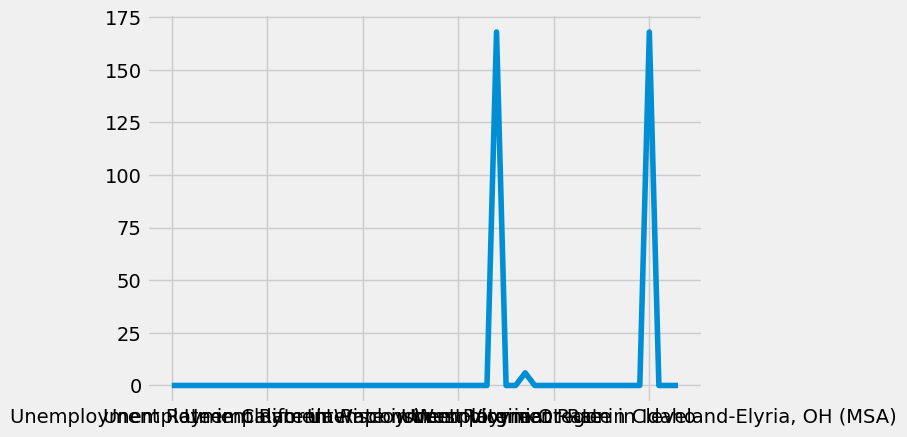

In [106]:
mgd.isna().sum().T.plot()

<AxesSubplot: >

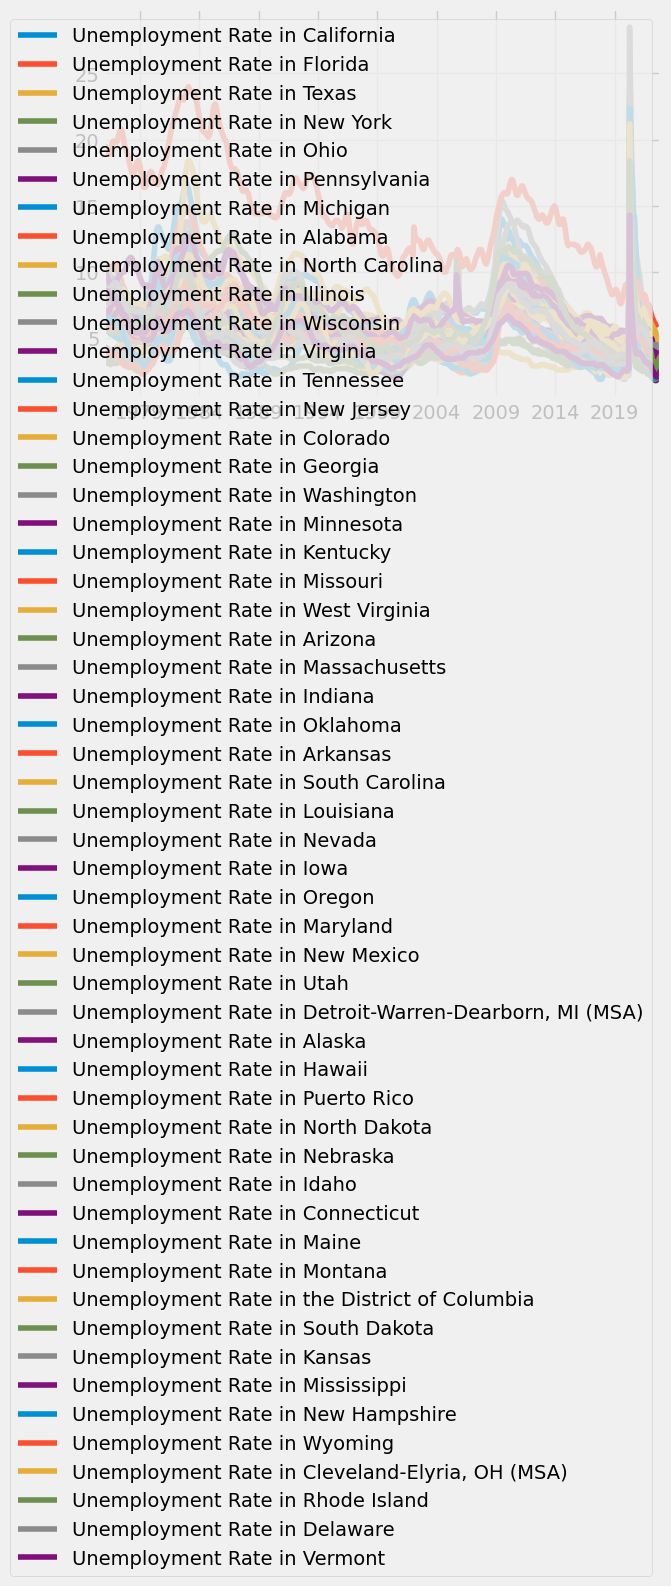

In [104]:
mgd.plot()

### Pull unemployment rate by state

In [121]:
new_columns = [state.replace("Unemployment Rate in ", "") for state in mgd.columns]
new_columns
mgd.columns = new_columns


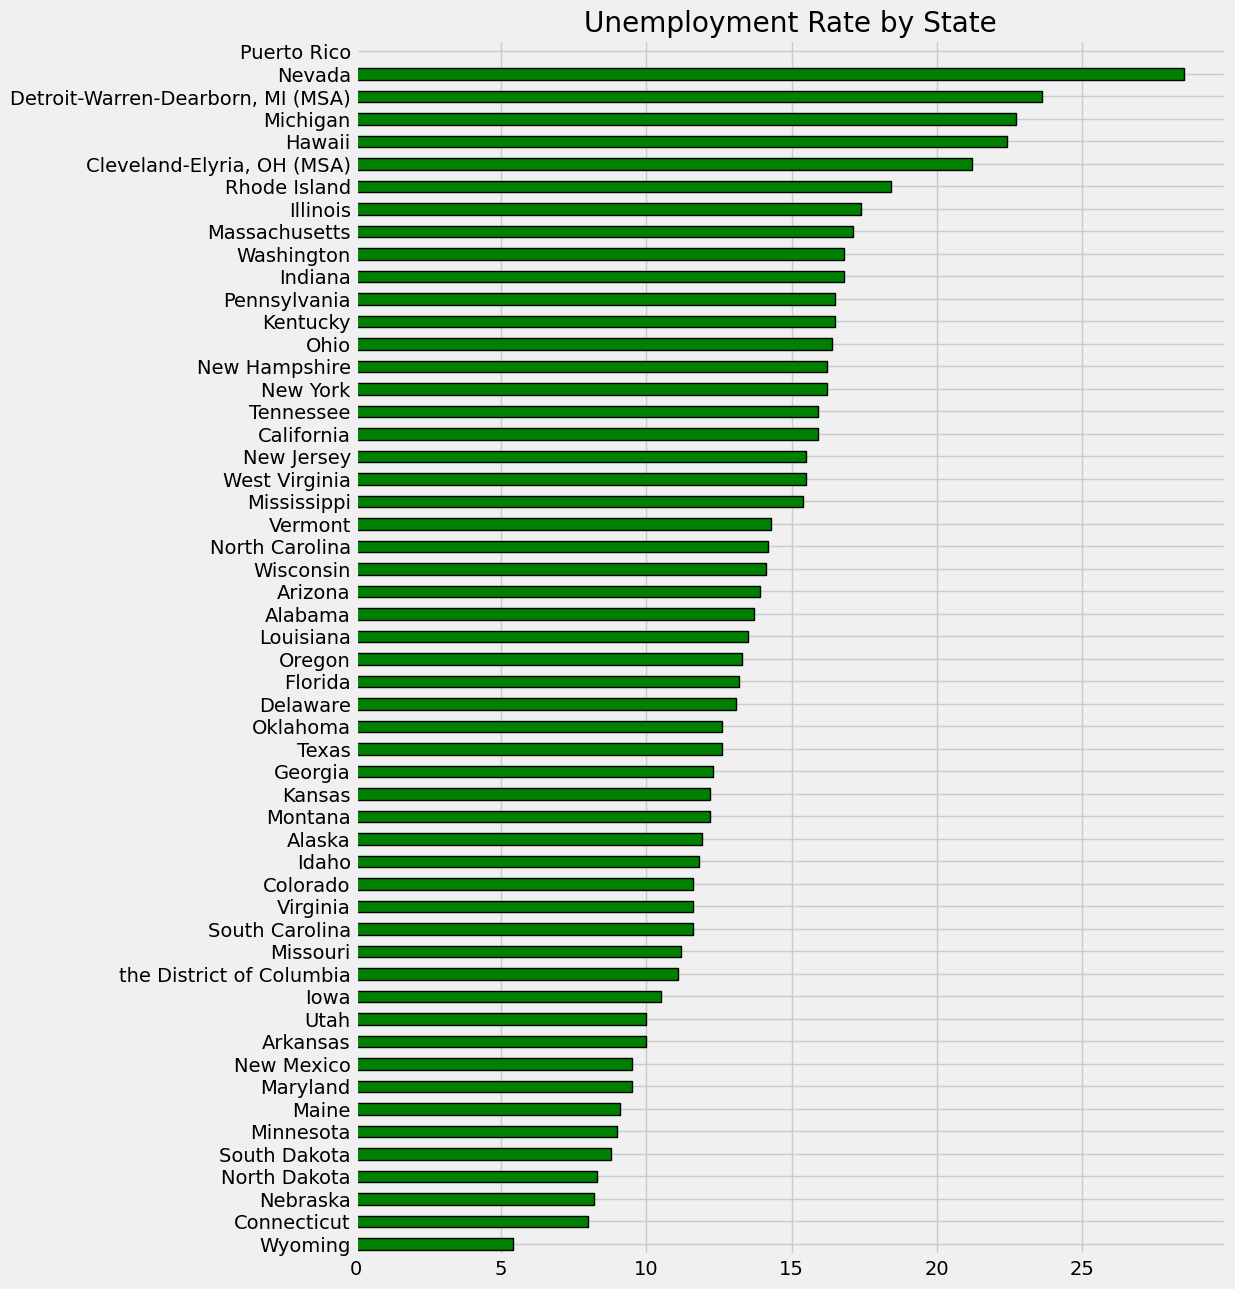

In [133]:
ax = mgd.loc[mgd.index == "2020-04-01"].T.sort_values("2020-04-01").plot(kind='barh', figsize=(10,15), title='Unemployment Rate by State', lw=1, edgecolor='black', color="green")
ax.legend().set_visible(False)